In [1]:
# pip install pycountry

In [2]:
# pip install pycountry-convert

In [3]:
# pip install umap-learn

In [4]:
# pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import pycountry_convert as pc
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from umap import UMAP

pd.options.display.max_rows=150

data = pd.read_csv('https://docs.google.com/spreadsheets/d/1tKsU3e8lmVsBB3in3i0L5tcaoZiYyTHGFSid1Sk30Fs/export?format=csv')
data

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


# Suicide Rates Overview: 1985 - 2016

# The goal is to find any trends in the data concerning suicide rates. If we find any, it might help us to attack the issue at its source rather than attempting to treat symptoms. We will start with some general data exploration.

In [6]:
data.sex.unique()

array(['male', 'female'], dtype=object)

In [7]:
data.age.unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [8]:
data.generation.unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

### We can see that they have used age ranges to classify the number of suicides into generational categories. The GI generation is those who fought in The Great War, also known as World War I. They were followed by the Silent generation, those were who born after the war. Next is the Boomers, the generation born to the Silent generation after World War II. Then it finishes out with Generation X, Milennials (also called Gen Y), and Generation Z, respectively.

### Also, they have classified all suicides according to the biological sex of the person. They have not accounted for gender expressions, nor have they included categories for expressions of sexuality. This is going to hurt our ability to find underlying causes since we are limited to biology, generation, GDP, population, and the Human Development Index.

### HDI is a measure that seeks to explain numerous data points in different countries such as their GDP, povery levels, human rights characteristics, as well as levels of racism, sexism, and income disparity. Where possible, HDI might allow us some insight into where countries rank on the scale (continuous from 0 to 1) and help determine if we should dig a little deeper outside our data set to consider those factors not included.

### Additionally, we can infer that the population is not a national population, but a population according to biological sex and their generational category.

In [9]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


### The mean number of suicides per 100k population is 12.81. This is irrespective of year, biology, generation, or national origin, as it is the mean for all of the values in the suicides per 100k population column. It would be interesting to look further into those categories.

In [5]:
countries = len(data.country.unique())
print(f'There are {countries} countries in the data set.')

There are 101 countries in the data set.


In [11]:
data.sex.value_counts()

male      13910
female    13910
Name: sex, dtype: int64

In [12]:
data.generation.value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

In [13]:
country = data.groupby('country').mean()
country.sort_values('suicides/100k pop', ascending=False)

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
country,,,,,,
Lithuania,2005.419847,107.019084,2.598672e+05,40.415573,0.803500,9280.549618
Sri Lanka,1997.545455,421.522727,1.382770e+06,35.295152,0.638000,904.272727
Russian Federation,2002.000000,3733.771605,1.139137e+07,34.892377,NaN,6518.814815
Hungary,2003.419355,238.358065,8.020782e+05,32.761516,0.803875,9370.051613
Belarus,2001.095238,237.666667,7.832234e+05,31.075913,0.771200,3333.904762
Kazakhstan,2002.500000,325.467949,1.209980e+06,30.511282,0.740889,5329.115385
Latvia,2005.000000,50.674603,1.779867e+05,29.259325,0.784250,8961.095238
Slovenia,2005.000000,42.123016,1.597961e+05,27.827857,0.856500,18642.238095
Estonia,2005.000000,27.912698,1.075032e+05,27.276905,0.823125,11376.095238


In [14]:
above_mean_suicide_rate = country.loc[country['suicides/100k pop'] > 12.816]
len(above_mean_suicide_rate)

39

### Out of 101 countries on our list, 39 have an above average suicide rate over the collected data from 1985-2016.

### In dividing out by decade, we will count 0-9 as a decade.

In [15]:
the_80s = data.loc[data['year'] <=1989]
the_90s = data.loc[data['year'] >=1990]
the_90s = the_90s.loc[the_90s['year'] <=1999]
the_00s = data.loc[data['year'] >=2000]
the_00s = the_00s.loc[the_00s['year'] <=2009]
the_10s = data.loc[data['year'] >=2010]

In [16]:
the_80s.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,3012.000000,3012.000000,3.012000e+03,3012.000000,444.000000,3012.000000
mean,1987.035857,214.091965,1.797194e+06,12.100548,0.699162,8365.828685
std,1.406930,695.816299,3.732964e+06,17.669893,0.078388,7495.005471
min,1985.000000,0.000000,4.240000e+02,0.000000,0.539000,431.000000
25%,1986.000000,2.000000,5.200000e+04,0.530000,0.648000,2303.000000
50%,1987.000000,19.500000,3.399000e+05,6.115000,0.713000,5517.000000
75%,1988.000000,123.250000,1.349250e+06,16.335000,0.753000,12992.000000
max,1989.000000,12030.000000,3.126400e+07,144.650000,0.841000,29239.000000


In [17]:
the80s = the_80s.groupby('country').mean()
above_mean_80s = the80s.loc[the80s['suicides/100k pop'] > 12.1]
len(above_mean_80s)

27

In [18]:
the_90s.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,8640.000000,8640.000000,8.640000e+03,8640.000000,1356.000000,8640.000000
mean,1994.765278,265.417361,1.859222e+06,14.380521,0.727301,11611.640278
std,2.867930,1000.808593,3.761200e+06,20.913419,0.092781,12189.632847
min,1990.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1992.000000,3.000000,1.224770e+05,1.117500,0.664000,1992.250000
50%,1995.000000,30.000000,4.652500e+05,6.800000,0.731000,5326.000000
75%,1997.000000,153.000000,1.510725e+06,18.780000,0.803000,20952.000000
max,1999.000000,22338.000000,4.086160e+07,224.970000,0.883000,56499.000000


In [19]:
the90s = the_90s.groupby('country').mean()
above_mean_90s = the90s.loc[the90s['suicides/100k pop'] > 14.381]
len(above_mean_90s)

34

In [20]:
the_00s.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,10308.000000,10308.000000,1.030800e+04,10308.000000,1824.000000,10308.000000
mean,2004.501746,236.670256,1.768809e+06,12.627453,0.766197,18365.919674
std,2.888184,924.266480,3.905908e+06,18.998982,0.090543,19261.291875
min,2000.000000,0.000000,2.780000e+02,0.000000,0.552000,313.000000
25%,2002.000000,2.000000,8.343900e+04,0.797500,0.694750,4087.000000
50%,2004.000000,22.000000,3.977240e+05,5.470000,0.765500,9843.000000
75%,2007.000000,118.000000,1.413346e+06,16.250000,0.851500,29048.000000
max,2009.000000,21262.000000,4.380521e+07,204.920000,0.931000,121315.000000


In [21]:
the00s = the_00s.groupby('country').mean()
above_mean_00s = the00s.loc[the00s['suicides/100k pop'] > 12.627]
len(above_mean_00s)

34

In [22]:
the_10s.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,5860.000000,5860.000000,5.860000e+03,5860.000000,4740.000000,5860.000000
mean,2012.436860,233.920137,1.981647e+06,11.209128,0.801962,26345.851877
std,1.757516,796.023513,4.215016e+06,16.132443,0.085159,24930.460407
min,2010.000000,0.000000,9.390000e+02,0.000000,0.611000,991.000000
25%,2011.000000,3.000000,1.189278e+05,1.010000,0.737000,8137.000000
50%,2012.000000,26.000000,4.915070e+05,5.440000,0.812000,15540.000000
75%,2014.000000,124.000000,1.610985e+06,14.510000,0.881000,42781.000000
max,2016.000000,11767.000000,4.279850e+07,187.060000,0.944000,126352.000000


In [23]:
the10s = the_10s.groupby('country').mean()
above_mean_10s = the10s.loc[the10s['suicides/100k pop'] > 11.209]
len(above_mean_10s)

37

### From this we see the 90s were the worst in terms of overall suicide rate and the number of countries above the world mean. However, some headway seems to have been made as we are below the data mean and at the lowest world wide rate from 2010-2016.

### Now let's see if we can find some underlying causes.

In [24]:
data.isna().mean()

country               0.000000
year                  0.000000
sex                   0.000000
age                   0.000000
suicides_no           0.000000
population            0.000000
suicides/100k pop     0.000000
country-year          0.000000
HDI for year          0.699353
gdp_for_year ($)      0.000000
gdp_per_capita ($)    0.000000
generation            0.000000
dtype: float64

In [25]:
# a lot of NAs in HDI so we will drop it for now
data_clean = data.dropna()
data_clean.isna().mean()

country               0.0
year                  0.0
sex                   0.0
age                   0.0
suicides_no           0.0
population            0.0
suicides/100k pop     0.0
country-year          0.0
HDI for year          0.0
gdp_for_year ($)      0.0
gdp_per_capita ($)    0.0
generation            0.0
dtype: float64

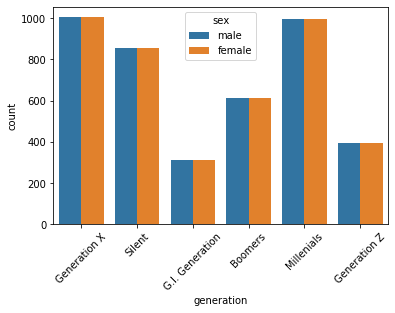

In [26]:
count_plot = sns.countplot(x='generation', hue='sex', data=data_clean, orient='v')
count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=45);

In [27]:
data.sex.value_counts()

male      13910
female    13910
Name: sex, dtype: int64

### Our chart seemed a little conspicuous, so we double check with the original data to see that, indeed, the data set had already been evenly divided by biological sex and generation. This calls for a deeper dive into that data.

In [28]:
data_male = data.loc[data['sex']=='male']
data_female = data.loc[data['sex']=='female']

In [29]:
data_male.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,13910.000000,13910.000000,1.391000e+04,13910.000000,4182.000000,13910.000000
mean,2001.258375,373.034508,1.800818e+06,20.239329,0.776601,16866.464414
std,8.469207,1217.448508,3.851195e+06,23.552754,0.093372,18887.915954
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,4.000000,9.450000e+04,2.422500,0.713000,3447.000000
50%,2002.000000,48.000000,4.107945e+05,13.550000,0.779000,9372.000000
75%,2008.000000,234.750000,1.441312e+06,27.360000,0.855000,24874.000000
max,2016.000000,22338.000000,4.313991e+07,224.970000,0.944000,126352.000000


In [30]:
data_female.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,13910.000000,13910.000000,1.391000e+04,13910.000000,4182.000000,13910.000000
mean,2001.258375,112.114306,1.888769e+06,5.392866,0.776601,16866.464414
std,8.469207,333.491224,3.971091e+06,7.358993,0.093372,18887.915954
min,1985.000000,0.000000,4.600000e+02,0.000000,0.483000,251.000000
25%,1995.000000,1.000000,1.004888e+05,0.410000,0.713000,3447.000000
50%,2002.000000,14.000000,4.507660e+05,3.160000,0.779000,9372.000000
75%,2008.000000,73.000000,1.519010e+06,7.410000,0.855000,24874.000000
max,2016.000000,4053.000000,4.380521e+07,133.420000,0.944000,126352.000000


### This creates much more concerning questions. It is apparent that males are nearly four times as likely to commit suicide than are females.

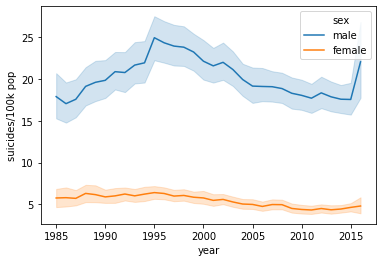

In [31]:
sns.lineplot(x="year", y="suicides/100k pop", hue="sex", data=data);

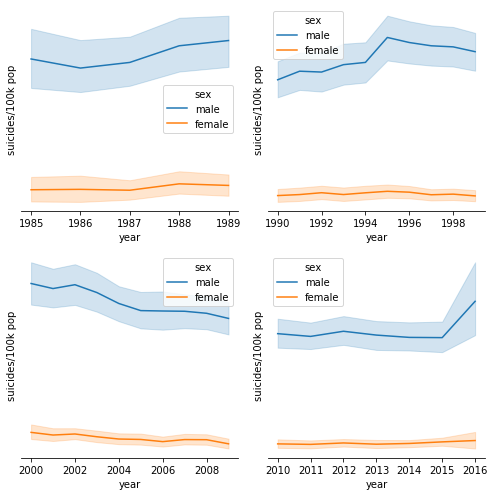

In [32]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=False)
sns.despine(left=True)

sns.lineplot(x="year", y="suicides/100k pop", hue="sex", data=the_80s, ax=axes[0, 0]);
sns.lineplot(x="year", y="suicides/100k pop", hue="sex", data=the_90s, ax=axes[0, 1]);
sns.lineplot(x="year", y="suicides/100k pop", hue="sex", data=the_00s, ax=axes[1, 0]);
sns.lineplot(x="year", y="suicides/100k pop", hue="sex", data=the_10s, ax=axes[1, 1]);

plt.setp(axes, yticks=[])
plt.tight_layout()

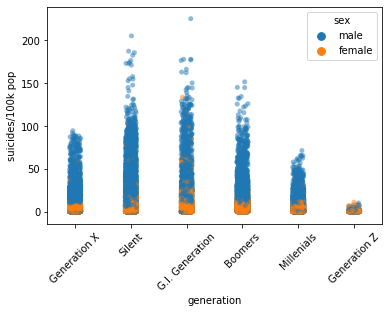

In [33]:
strip_plot = sns.stripplot(x='generation', y='suicides/100k pop', hue='sex', data=data, alpha=.5)
strip_plot.set_xticklabels(strip_plot.get_xticklabels(), rotation=45);

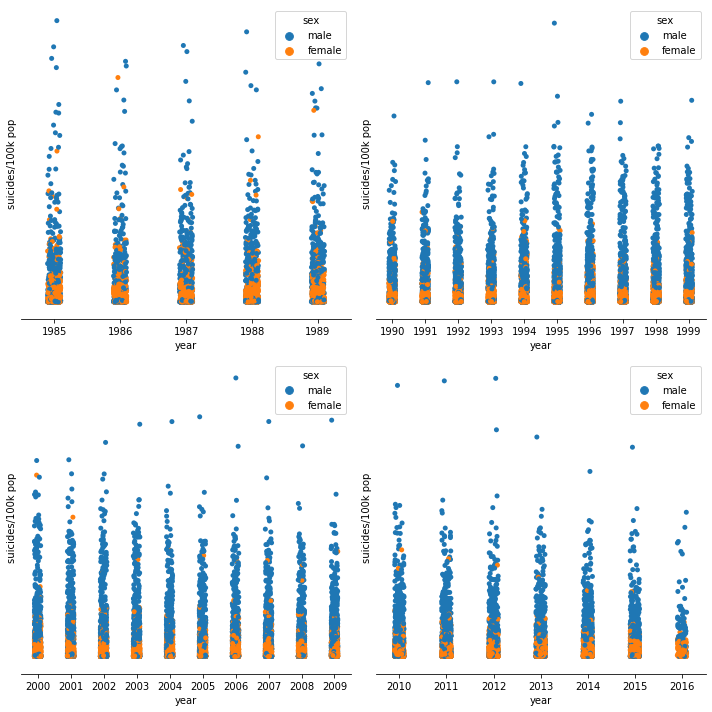

In [34]:
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=False)
sns.despine(left=True)

sns.stripplot(x="year", y="suicides/100k pop", hue="sex", data=the_80s, ax=axes[0, 0]);
sns.stripplot(x="year", y="suicides/100k pop", hue="sex", data=the_90s, ax=axes[0, 1]);
sns.stripplot(x="year", y="suicides/100k pop", hue="sex", data=the_00s, ax=axes[1, 0]);
sns.stripplot(x="year", y="suicides/100k pop", hue="sex", data=the_10s, ax=axes[1, 1]);

plt.setp(axes, yticks=[])
plt.tight_layout()

### There seem to be quite a bit of outliers in terms of males that are pulling up their mean rates. Indeed, for females as well, though not as many. We will use our male and female subsets and see if any discernable clusters begin to appear. First, we will transform our generations from categoricals so we can keep age information.

In [35]:
data_male = data_male.reset_index(drop=True)
generations = {'G.I. Generation': 0, 'Silent': 1, 'Boomers': 2, 'Generation X': 3, 'Millenials': 4, 'Generation Z': 5}
data_male['generation'] = data_male.generation.replace(generations)

### Now we will use Kmeans to visualize our data, increasing from 2 to 5 in order to see if reveals further information.

In [36]:
X2 = data_male.drop(columns=['age','country','country-year','sex','gdp_for_year ($)','suicides_no','HDI for year'])

scaler = StandardScaler()
scaler.fit(X2)
X2_scaled = scaler.transform(X2)

X3 = data_male.drop(columns=['age','country','country-year','sex','gdp_for_year ($)','suicides_no','HDI for year'])

scaler = StandardScaler()
scaler.fit(X3)
X3_scaled = scaler.transform(X3)

X4 = data_male.drop(columns=['age','country','country-year','sex','gdp_for_year ($)','suicides_no','HDI for year'])

scaler = StandardScaler()
scaler.fit(X4)
X4_scaled = scaler.transform(X4)

X5 = data_male.drop(columns=['age','country','country-year','sex','gdp_for_year ($)','suicides_no','HDI for year'])

scaler = StandardScaler()
scaler.fit(X5)
X5_scaled = scaler.transform(X5)

In [37]:
kme2 = KMeans(n_clusters=2, random_state=34)
kme2.fit(X2_scaled)


centroids2 = kme2.cluster_centers_
centroids2_df = pd.DataFrame(scaler.inverse_transform(centroids2),
                            columns=X2.columns)
data_male['2 clusters'] = kme2.labels_
data_male['2 clusters'] = data_male['2 clusters'].astype(str)+'_'

kme3 = KMeans(n_clusters=3, random_state=34)
kme3.fit(X3_scaled)


centroids3 = kme3.cluster_centers_
centroids3_df = pd.DataFrame(scaler.inverse_transform(centroids3),
                            columns=X3.columns)
data_male['3 clusters'] = kme3.labels_
data_male['3 clusters'] = data_male['3 clusters'].astype(str)+'_'

kme4 = KMeans(n_clusters=4, random_state=34)
kme4.fit(X4_scaled)


centroids4 = kme4.cluster_centers_
centroids4_df = pd.DataFrame(scaler.inverse_transform(centroids4),
                            columns=X4.columns)
data_male['4 clusters'] = kme4.labels_
data_male['4 clusters'] = data_male['4 clusters'].astype(str)+'_'

kme5 = KMeans(n_clusters=5, random_state=34)
kme5.fit(X5_scaled)


centroids5 = kme5.cluster_centers_
centroids5_df = pd.DataFrame(scaler.inverse_transform(centroids5),
                            columns=X5.columns)
data_male['5 clusters'] = kme5.labels_
data_male['5 clusters'] = data_male['5 clusters'].astype(str)+'_'

In [38]:
centroids2_df

,year,population,suicides/100k pop,gdp_per_capita ($),generation
0,1996.103444,1.351066e+06,28.109708,9893.435763,1.506431
1,2006.839347,2.287740e+06,11.718485,24415.793682,3.331936


In [39]:
centroids3_df

,year,population,suicides/100k pop,gdp_per_capita ($),generation
0,1996.044302,9.622954e+05,28.170908,9755.022151,1.477995
1,2006.912829,1.117030e+06,11.264602,24171.734661,3.334183
2,2001.642950,1.479527e+07,22.684230,20693.302717,2.694696


In [40]:
centroids4_df

,year,population,suicides/100k pop,gdp_per_capita ($),generation
0,2001.852011,1.541475e+07,20.855216,21313.441092,2.732759
1,1995.074813,1.053865e+06,13.621919,8450.011305,1.895761
2,2000.711615,9.995270e+05,68.044714,13825.722380,1.012465
3,2008.204637,1.144193e+06,11.957871,26600.873574,3.322598


In [41]:
centroids5_df

,year,population,suicides/100k pop,gdp_per_capita ($),generation
0,2008.616066,1.424971e+06,16.769989,54447.361219,2.742382
1,2000.971429,9.729122e+05,71.853552,12015.764286,1.061688
2,2006.009007,1.072838e+06,9.778178,11628.981781,3.441556
3,2001.710807,1.580775e+07,20.873394,20815.639269,2.756469
4,1994.023094,1.065601e+06,15.752447,9426.100936,1.580530


In [42]:
X2['cluster'] = kme2.labels_
X2['cluster'] = data_male['2 clusters'].astype(str)+'_'

X3['cluster'] = kme3.labels_
X3['cluster'] = data_male['3 clusters'].astype(str)+'_'

X4['cluster'] = kme4.labels_
X4['cluster'] = data_male['4 clusters'].astype(str)+'_'

X5['cluster'] = kme5.labels_
X5['cluster'] = data_male['5 clusters'].astype(str)+'_'

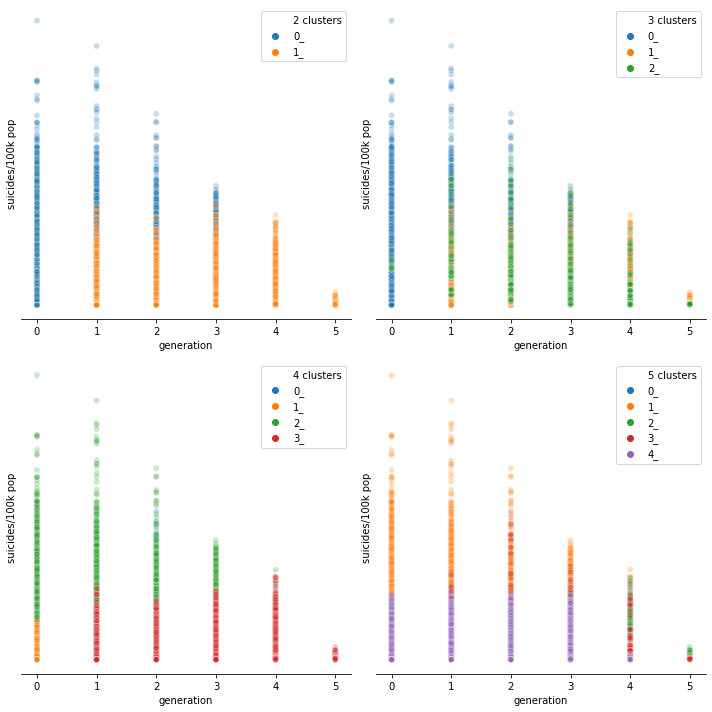

In [43]:
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=False)
sns.despine(left=True)

data_male = data_male.sort_values('2 clusters')
sns.scatterplot(x='generation', y='suicides/100k pop', hue='2 clusters', data=data_male, alpha=.25, ax = axes[0,0]);
data_male = data_male.sort_values('3 clusters')
sns.scatterplot(x='generation', y='suicides/100k pop', hue='3 clusters', data=data_male, alpha=.25, ax = axes[0,1]);
data_male = data_male.sort_values('4 clusters')
sns.scatterplot(x='generation', y='suicides/100k pop', hue='4 clusters', data=data_male, alpha=.25, ax = axes[1,0]);
data_male = data_male.sort_values('5 clusters')
sns.scatterplot(x='generation', y='suicides/100k pop', hue='5 clusters', data=data_male, alpha=.25, ax = axes[1,1]);

plt.setp(axes, yticks=[])
plt.tight_layout()

### The older generations seem to be much higher in terms of risk.

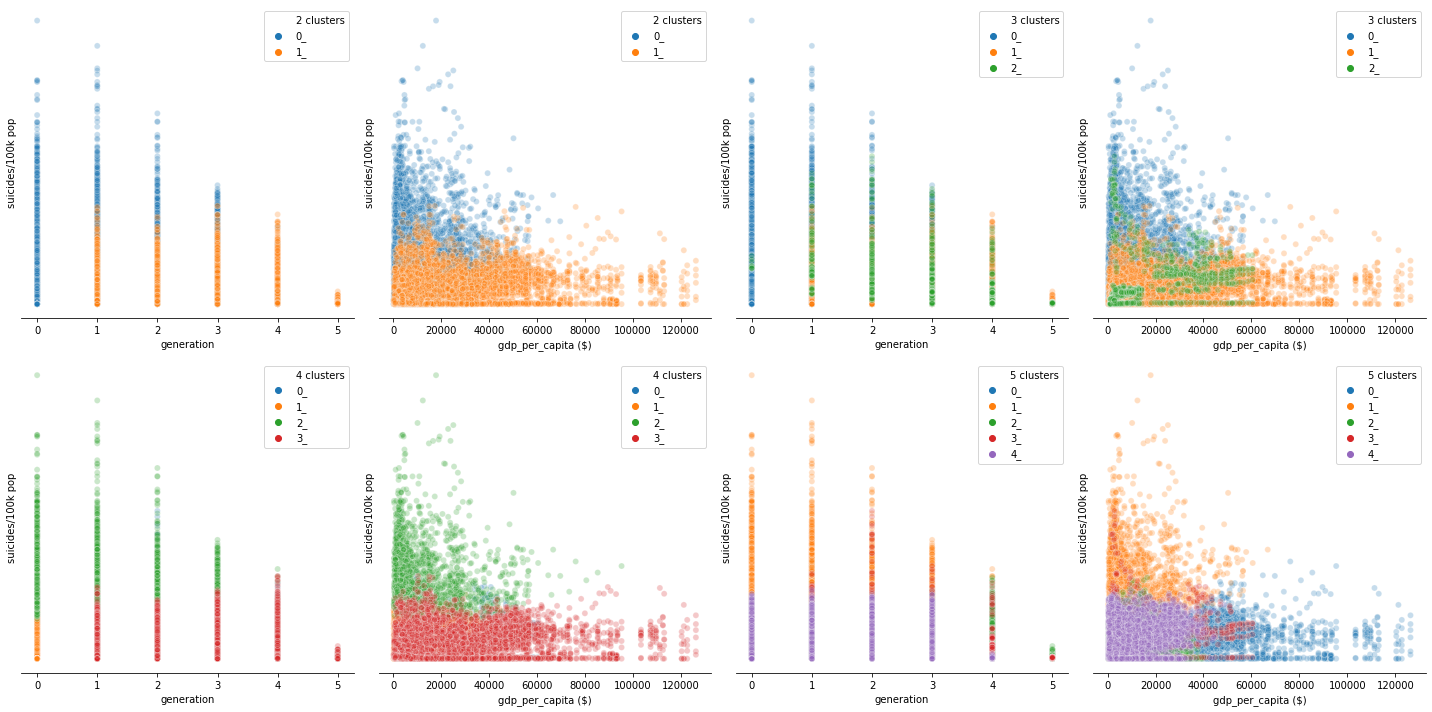

In [44]:
f, axes = plt.subplots(2, 4, figsize=(20, 10), sharex=False)
sns.despine(left=True)

data_male = data_male.sort_values('2 clusters')
sns.scatterplot(x='generation', y='suicides/100k pop', hue='2 clusters', data=data_male, alpha=.25, ax=axes[0, 0]);
sns.scatterplot(x='gdp_per_capita ($)', y='suicides/100k pop', hue='2 clusters', data=data_male, alpha=.25, ax=axes[0, 1]);
data_male = data_male.sort_values('3 clusters')
sns.scatterplot(x='generation', y='suicides/100k pop', hue='3 clusters', data=data_male, alpha=.25, ax=axes[0, 2]);
sns.scatterplot(x='gdp_per_capita ($)', y='suicides/100k pop', hue='3 clusters', data=data_male, alpha=.25, ax=axes[0, 3]);
data_male = data_male.sort_values('4 clusters')
sns.scatterplot(x='generation', y='suicides/100k pop', hue='4 clusters', data=data_male, alpha=.25, ax=axes[1, 0]);
sns.scatterplot(x='gdp_per_capita ($)', y='suicides/100k pop', hue='4 clusters', data=data_male, alpha=.25, ax=axes[1, 1]);
data_male = data_male.sort_values('5 clusters')
sns.scatterplot(x='generation', y='suicides/100k pop', hue='5 clusters', data=data_male, alpha=.25, ax=axes[1, 2]);
sns.scatterplot(x='gdp_per_capita ($)', y='suicides/100k pop', hue='5 clusters', data=data_male, alpha=.25, ax=axes[1, 3]);

plt.setp(axes, yticks=[])
plt.tight_layout()

### One of the first places to look for a cause based on our data set is GDP since it is the measure of wealth in a country per person (per capita). This keep us from a bias of saying this country or that country is higher or lower and focus on the economic condition.

### As we can see, the biggest risk factors seem to be age and poverty. The older and poorer the cluster, the higher the rate. However, poverty also shows an affect on younger generations, albeit to a lesser degree.

### Let's see if this holds true with the female population.

In [45]:
data_female = data_female.reset_index(drop=True)
generations = {'G.I. Generation': 0, 'Silent': 1, 'Boomers': 2, 'Generation X': 3, 'Millenials': 4, 'Generation Z': 5}
data_female['generation'] = data_female.generation.replace(generations)

In [46]:
X2 = data_female.drop(columns=['age','country','country-year','sex','gdp_for_year ($)','suicides_no','HDI for year'])

scaler = StandardScaler()
scaler.fit(X2)
X2_scaled = scaler.transform(X2)

X3 = data_female.drop(columns=['age','country','country-year','sex','gdp_for_year ($)','suicides_no','HDI for year'])

scaler = StandardScaler()
scaler.fit(X3)
X3_scaled = scaler.transform(X3)

X4 = data_female.drop(columns=['age','country','country-year','sex','gdp_for_year ($)','suicides_no','HDI for year'])

scaler = StandardScaler()
scaler.fit(X4)
X4_scaled = scaler.transform(X4)

X5 = data_female.drop(columns=['age','country','country-year','sex','gdp_for_year ($)','suicides_no','HDI for year'])

scaler = StandardScaler()
scaler.fit(X5)
X5_scaled = scaler.transform(X5)

In [47]:
kme2 = KMeans(n_clusters=2, random_state=34)
kme2.fit(X2_scaled)


centroids2 = kme2.cluster_centers_
centroids2_df = pd.DataFrame(scaler.inverse_transform(centroids2),
                            columns=X2.columns)
data_female['2 clusters'] = kme2.labels_
data_female['2 clusters'] = data_female['2 clusters'].astype(str)+'_'

kme3 = KMeans(n_clusters=3, random_state=34)
kme3.fit(X3_scaled)


centroids3 = kme3.cluster_centers_
centroids3_df = pd.DataFrame(scaler.inverse_transform(centroids3),
                            columns=X3.columns)
data_female['3 clusters'] = kme3.labels_
data_female['3 clusters'] = data_female['3 clusters'].astype(str)+'_'

kme4 = KMeans(n_clusters=4, random_state=34)
kme4.fit(X4_scaled)


centroids4 = kme4.cluster_centers_
centroids4_df = pd.DataFrame(scaler.inverse_transform(centroids4),
                            columns=X4.columns)
data_female['4 clusters'] = kme4.labels_
data_female['4 clusters'] = data_female['4 clusters'].astype(str)+'_'

kme5 = KMeans(n_clusters=5, random_state=34)
kme5.fit(X5_scaled)


centroids5 = kme5.cluster_centers_
centroids5_df = pd.DataFrame(scaler.inverse_transform(centroids5),
                            columns=X5.columns)
data_female['5 clusters'] = kme5.labels_
data_female['5 clusters'] = data_female['5 clusters'].astype(str)+'_'

In [48]:
centroids2_df

,year,population,suicides/100k pop,gdp_per_capita ($),generation
0,1995.588749,1.592660e+06,7.192702,9552.229181,1.574477
1,2007.371881,2.208061e+06,3.452120,24753.336620,3.254744


In [49]:
centroids3_df

,year,population,suicides/100k pop,gdp_per_capita ($),generation
0,2005.402437,1.371804e+06,2.578169,11450.805039,3.235468
1,2007.887673,4.484478e+06,6.030167,51577.318896,2.724893
2,1994.442643,1.485344e+06,8.139500,9886.302999,1.355126


In [50]:
centroids4_df

,year,population,suicides/100k pop,gdp_per_capita ($),generation
0,1995.434438,1.112912e+06,3.461512,8098.227486,1.883428
1,2008.303389,1.129059e+06,3.274144,26144.351312,3.309038
2,2001.738063,1.561028e+07,5.733261,21481.192360,2.597544
3,1999.267952,1.164104e+06,20.900492,16821.189495,0.953457


In [51]:
centroids5_df

,year,population,suicides/100k pop,gdp_per_capita ($),generation
0,2008.589397,1.395825e+06,5.275888,54752.561196,2.787930
1,2006.392215,1.063566e+06,2.587981,11713.333926,3.339261
2,1999.084891,1.190833e+06,22.228832,14134.021807,0.936137
3,2001.590652,1.585499e+07,5.748527,20987.732295,2.594901
4,1994.096736,1.119274e+06,3.925004,8904.762682,1.626032


In [52]:
X2['cluster'] = kme2.labels_
X2['cluster'] = data_female['2 clusters'].astype(str)+'_'

X3['cluster'] = kme3.labels_
X3['cluster'] = data_female['3 clusters'].astype(str)+'_'

X4['cluster'] = kme4.labels_
X4['cluster'] = data_female['4 clusters'].astype(str)+'_'

X5['cluster'] = kme5.labels_
X5['cluster'] = data_female['5 clusters'].astype(str)+'_'

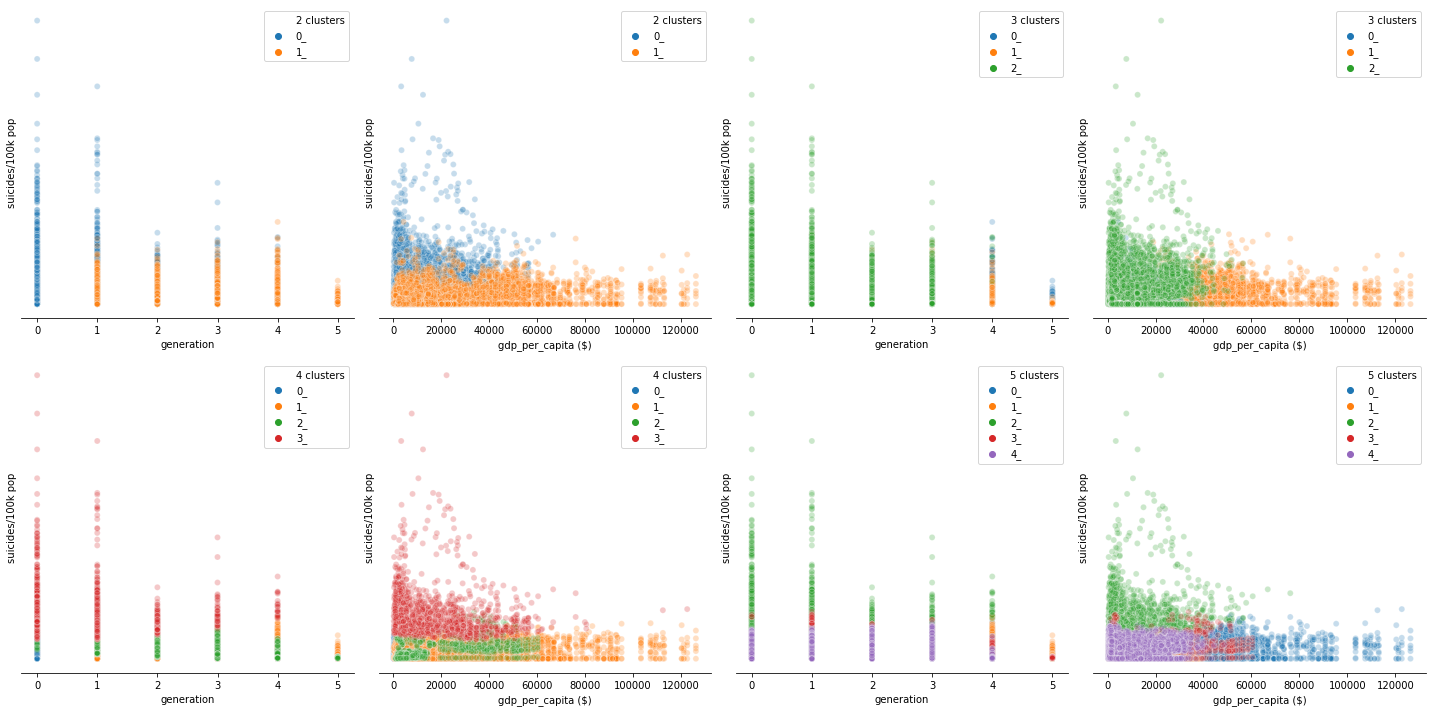

In [53]:
f, axes = plt.subplots(2, 4, figsize=(20, 10), sharex=False)
sns.despine(left=True)

data_female = data_female.sort_values('2 clusters')
sns.scatterplot(x='generation', y='suicides/100k pop', hue='2 clusters', data=data_female, alpha=.25, ax=axes[0, 0]);
sns.scatterplot(x='gdp_per_capita ($)', y='suicides/100k pop', hue='2 clusters', data=data_female, alpha=.25, ax=axes[0, 1]);
data_female = data_female.sort_values('3 clusters')
sns.scatterplot(x='generation', y='suicides/100k pop', hue='3 clusters', data=data_female, alpha=.25, ax=axes[0, 2]);
sns.scatterplot(x='gdp_per_capita ($)', y='suicides/100k pop', hue='3 clusters', data=data_female, alpha=.25, ax=axes[0, 3]);
data_female = data_female.sort_values('4 clusters')
sns.scatterplot(x='generation', y='suicides/100k pop', hue='4 clusters', data=data_female, alpha=.25, ax=axes[1, 0]);
sns.scatterplot(x='gdp_per_capita ($)', y='suicides/100k pop', hue='4 clusters', data=data_female, alpha=.25, ax=axes[1, 1]);
data_female = data_female.sort_values('5 clusters')
sns.scatterplot(x='generation', y='suicides/100k pop', hue='5 clusters', data=data_female, alpha=.25, ax=axes[1, 2]);
sns.scatterplot(x='gdp_per_capita ($)', y='suicides/100k pop', hue='5 clusters', data=data_female, alpha=.25, ax=axes[1, 3]);

plt.setp(axes, yticks=[])
plt.tight_layout()

### And the trend remains true: people in poverty who are advanced in age are at a higher risk of suicide. We can do much to bring hope in our world by reducing poverty.